Name: Max Wu
Semester: Fall 2023

# Part 1: Introduction and Setup

In [1]:
# import some libraries which will be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# use a random seed to ensure consistent results while testing

np.random.seed(887)

In [2]:
# read in our data frame
diabetes = pd.read_csv('Diabetes with Population Info by County 2017.csv')

# look at the shape of our data frame

df_shape = diabetes.shape
print("number of rows:", df_shape[0])
print("number of columns:", df_shape[1])

number of rows: 3220
number of columns: 95


In [3]:
# set pandas parameters
# this should tell pandas how many rows to display when printing so results don't get truncated

pd.set_option('display.max_rows', 100)


# look at the data types for each column in diabetes df (likely be located under each row bc column names are long)
# i made the data types into a separate object so i can print only a certain number of rows for readability

diabetes_dtypes = diabetes.dtypes

print('data types:', diabetes_dtypes.head(10))

data types: County                                                                              object
State                                                                               object
CountyFIPS                                                                           int64
Diabetes_Number                                                                     object
Obesity_Number                                                                      object
Physical_Inactivity_Number                                                          object
sex and age_total population_65 years and over_sex ratio (males per 100 females)    object
race_total population                                                                int64
race_total population_one race                                                       int64
race_total population_two or more races                                              int64
dtype: object


In [4]:
# so it looks like we have features which should be numeric, but are objects
# identify non-numeric features

# return rows where the column "Diabetes_Number" "Obesity_Number" and "Physical_Inactivity_Number" are non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values

print("Unique non-numeric values in Diabetes Number:", (diabetes[~diabetes['Diabetes_Number'].str.isnumeric()]['Diabetes_Number'].unique()))
print("Unique non-numeric values in Obesity Number:", (diabetes[~diabetes['Obesity_Number'].str.isnumeric()]['Obesity_Number'].unique()))
print("Unique non-numeric values in Physical Inactivity Number:", (diabetes[~diabetes['Physical_Inactivity_Number'].str.isnumeric()]['Physical_Inactivity_Number'].unique()))


Unique non-numeric values in Diabetes Number: ['Suppressed']
Unique non-numeric values in Obesity Number: ['No Data']
Unique non-numeric values in Physical Inactivity Number: ['No Data']


In [5]:
# so we have values "Suppresssed" and "No Data" causing these features to be objects instead of ints
# drop those rows for all three columns
diabetes = diabetes[diabetes['Diabetes_Number']!="Suppressed"] 
diabetes = diabetes[diabetes['Obesity_Number']!="No Data"] 
diabetes = diabetes[diabetes['Physical_Inactivity_Number']!="No Data"] 

# check to see if it worked
print("Remaining non-numeric values in Diabetes Number:", (diabetes[~diabetes['Diabetes_Number'].str.isnumeric()]['Diabetes_Number'].unique()))
print("Remaining non-numeric values in Obesity Number:", (diabetes[~diabetes['Obesity_Number'].str.isnumeric()]['Obesity_Number'].unique()))
print("Remaining non-numeric values in Physical Inactivity Number:", (diabetes[~diabetes['Physical_Inactivity_Number'].str.isnumeric()]['Physical_Inactivity_Number'].unique()))
print("\n")

# use the astype method on each column to convert to integers
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype('int64') 
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype('int64') 
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype('int64') 

# check to see if it worked
print("Data type of Diabetes_Number is now:",(diabetes['Diabetes_Number'].dtype))
print("Data type of Obesity Number is now:",(diabetes['Obesity_Number'].dtype))
print("Data type of Physical Inactivity Number is now:",(diabetes['Physical_Inactivity_Number'].dtype))
print("\n")

# apparently the column 65+ sex ratio had one "-" in it so let's drop that row and check
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype('float64')
print("Data type of 65+ Sex Ratio is now:",(diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].dtype))



Remaining non-numeric values in Diabetes Number: []
Remaining non-numeric values in Obesity Number: []
Remaining non-numeric values in Physical Inactivity Number: []


Data type of Diabetes_Number is now: int64
Data type of Obesity Number is now: int64
Data type of Physical Inactivity Number is now: int64


Data type of 65+ Sex Ratio is now: float64


In [6]:
# let's scale count variables to be proportional with county populations

# create list rc_cols to select all the features we care about
# select count variables to recode to percentages
# leave out ratios and our population var because these don't make sense to scale by population
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                        'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                        'race_total population']]
           
# recode all selected columns to numeric
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce') 

# divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)

# check to see if it worked
# set pandas options
pd.set_option('display.max_columns', None)

# inspect recoded values
# note we use the transpose method rather than .T because this object is not a numpy array
diabetes_summary = diabetes.describe().transpose() 
  
# check recoding 
# select which columns in the summary table we want to present
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary.iloc[ : ,[0,1,3,7]]) 
    
# looks like all values are bounded between 0 and 1

count           mean  \
CountyFIPS                                          3112.0   30374.235219   
Diabetes_Number                                     3112.0       0.092857   
Obesity_Number                                      3112.0       0.251666   
Physical_Inactivity_Number                          3112.0       0.200861   
sex and age_total population_65 years and over_...  3112.0      84.275643   
race_total population                               3112.0  103682.624036   
race_total population_one race                      3112.0       0.976059   
race_total population_two or more races             3112.0       0.023941   
race_total population_one race_1                    3112.0       0.976059   
race_total population_one race_white                3112.0       0.831107   
race_total population_one race_black or african...  3112.0       0.090215   
race_total population_one race_american indian ...  3112.0       0.019398   
race_total population_one race_american indian ...  3112.0       0.001791   
race_total population_one race_american indian ...  3112.0       0.001338   
race_total population_one race_american indian ...  3112.0       0.001229   
race_total population_one race_american indian ...  3112.0       0.003315   
race_total population_one race_asian                3112.0       0.013749   
race_total population_one race_asian_asian indian   3112.0       0.002628   
race_total population_one race_asian_chinese        3112.0       0.002644   
race_total population_one race_asian_filipino       3112.0       0.002744   
race_total population_one race_asian_japanese       3112.0       0.000707   
race_total population_one race_asian_korean         3112.0       0.001174   
race_total population_one race_asian_vietnamese     3112.0       0.001255   
race_total population_one race_asian_other asian    3112.0       0.002598   
race_total population_one race_native hawaiian ...  3112.0       0.000874   
race_total population_one race_native hawaiian ...  3112.0       0.000303   
race_total population_one race_native hawaiian ...  3112.0       0.000142   
race_total population_one race_native hawaiian ...  3112.0       0.000134   
race_total population_one race_native hawaiian ...  3112.0       0.000295   
race_total population_one race_some other race      3112.0       0.020716   
race_total population_two or more races_1           3112.0       0.023941   
race_total population_two or more races_white a...  3112.0       0.006444   
race_total population_two or more races_white a...  3112.0       0.008618   
race_total population_two or more races_white a...  3112.0       0.003021   
race_total population_two or more races_black o...  3112.0       0.000652   
race alone or in combination with one or more o...  3112.0       1.000000   
race alone or in combination with one or more o...  3112.0       0.852907   
race alone or in combination with one or more o...  3112.0       0.098875   
race alone or in combination with one or more o...  3112.0       0.029923   
race alone or in combination with one or more o...  3112.0       0.018213   
race alone or in combination with one or more o...  3112.0       0.002067   
race alone or in combination with one or more o...  3112.0       0.023626   
hispanic or latino and race_total population        3112.0       1.000000   
hispanic or latino and race_total population_hi...  3112.0       0.093201   
hispanic or latino and race_total population_hi...  3112.0       0.069331   
hispanic or latino and race_total population_hi...  3112.0       0.005656   
hispanic or latino and race_total population_hi...  3112.0       0.001568   
hispanic or latino and race_total population_hi...  3112.0       0.016645   
hispanic or latino and race_total population_no...  3112.0       0.906799   
hispanic or latino and race_total population_no...  3112.0       0.765065   
hispanic or latino and race_total population_no...  3112.0       0.088817   
hispanic or latino and race_total population_no..

In [7]:
# checking for duplicate columns now

def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames

Duplicate Columns are as follows: 


['hispanic or latino and race_total population',
 'sex and age_total population_65 years and over_1',
 'race_total population_two or more races_1',
 'race_total population_one race_1',
 'sex and age_total population',
 'sex and age_total population_18 years and over_1']

In [8]:
# now drop list of duplicate features from our df using the .drop() method
diabetes = diabetes.drop(columns=duplicateColumnNames) 

# check to see if it worked
duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are NOW as follows: ')
duplicateColumnNames

Duplicate Columns are NOW as follows: 


[]

In [9]:
# next, we'll define a dictionary mapping states to regions
state_to_region = {
    'Alabama': 'Southeast',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Southeast',
    'Florida': 'Southeast',
    'Georgia': 'Southeast',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'Southeast',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'Southeast',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'Southeast',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# adding a new 'Region' column based on the mapping
diabetes['Region'] = diabetes['State'].map(state_to_region)

# check to verify 'Region' column has been added 
# instead of printing the whole thing for readability, I printed the first 4 columns and the final column
print(diabetes.iloc[:, list(range(4)) + [-1]])

                 County    State  CountyFIPS  Diabetes_Number     Region
0        Autauga County  Alabama        1001         0.093804  Southeast
1        Baldwin County  Alabama        1003         0.080281  Southeast
2        Barbour County  Alabama        1005         0.131875  Southeast
3           Bibb County  Alabama        1007         0.105251  Southeast
4         Blount County  Alabama        1009         0.108977  Southeast
...                 ...      ...         ...              ...        ...
3215  Sweetwater County  Wyoming       56037         0.058028       West
3216       Teton County  Wyoming       56039         0.019038       West
3217       Uinta County  Wyoming       56041         0.069872       West
3218    Washakie County  Wyoming       56043         0.078361       West
3219      Weston County  Wyoming       56045         0.084648       West

[3112 rows x 5 columns]


# Part 2: Exploratory Data Analysis 

### The first few data visualizations are scatterplots which plot rates of diabetes against rates of obesity, physical inactivity, and age. It seems like there is a positive correlation between obesity and diabetes; and inactivity and diabetes. Not so much with median age of the population. My analysis: it seems that there is a positive correlation between obesity rate and diabetes rate. There is also a positive correlation between physical inactivity and diabetes, although I wonder if that is due to collinearity between obesity and physical inactivity.


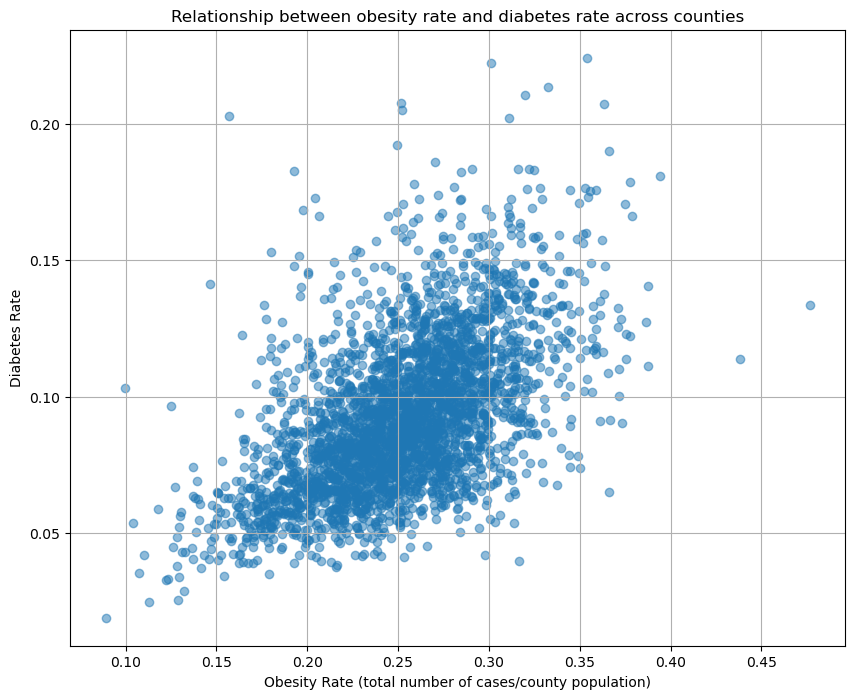

In [10]:
# create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(diabetes['Obesity_Number'], diabetes['Diabetes_Number'], alpha=0.5)
plt.title('Relationship between obesity rate and diabetes rate across counties')
plt.xlabel('Obesity Rate (total number of cases/county population)')
plt.ylabel('Diabetes Rate')
plt.grid(True)

# show the plot
plt.show()

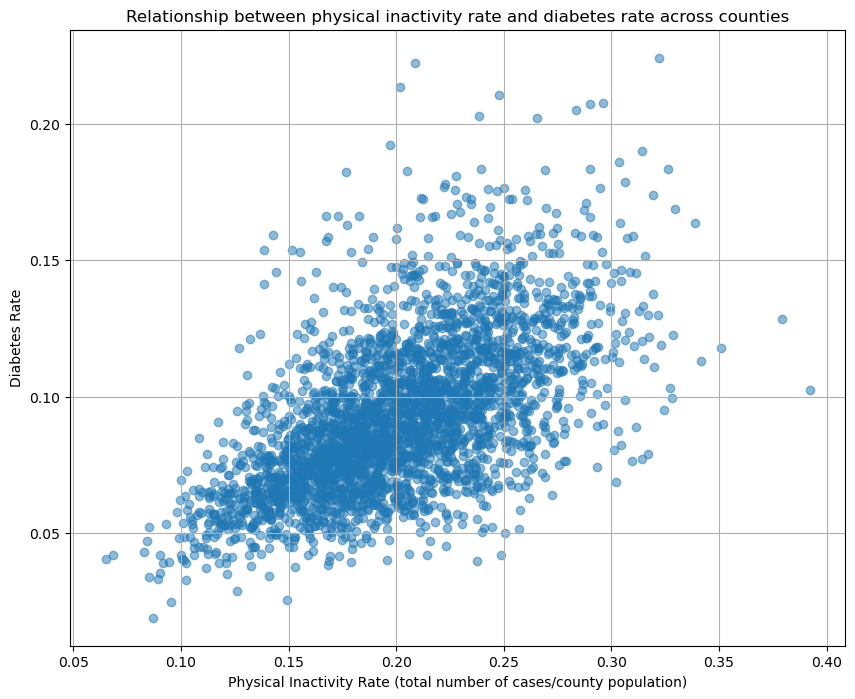

In [11]:
# create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(diabetes['Physical_Inactivity_Number'], diabetes['Diabetes_Number'], alpha=0.5)
plt.title('Relationship between physical inactivity rate and diabetes rate across counties')
plt.xlabel('Physical Inactivity Rate (total number of cases/county population)')
plt.ylabel('Diabetes Rate')
plt.grid(True)

# show the plot
plt.show()

### Here are some bar charts organizing diabetes rates by state and region. My analysis or interpretation here is that the American South and Southeast have the highest average rates of diabetes as regions as a whole. In terms of individual states, Alabama has the highest rate of average diabetes across its counties, followed by South Carolina and West Virginia. I suspect this might be due to cultural differences in diet, lifestyle, or perhaps access to affordable healthy foods, health literacy/education, and other things.

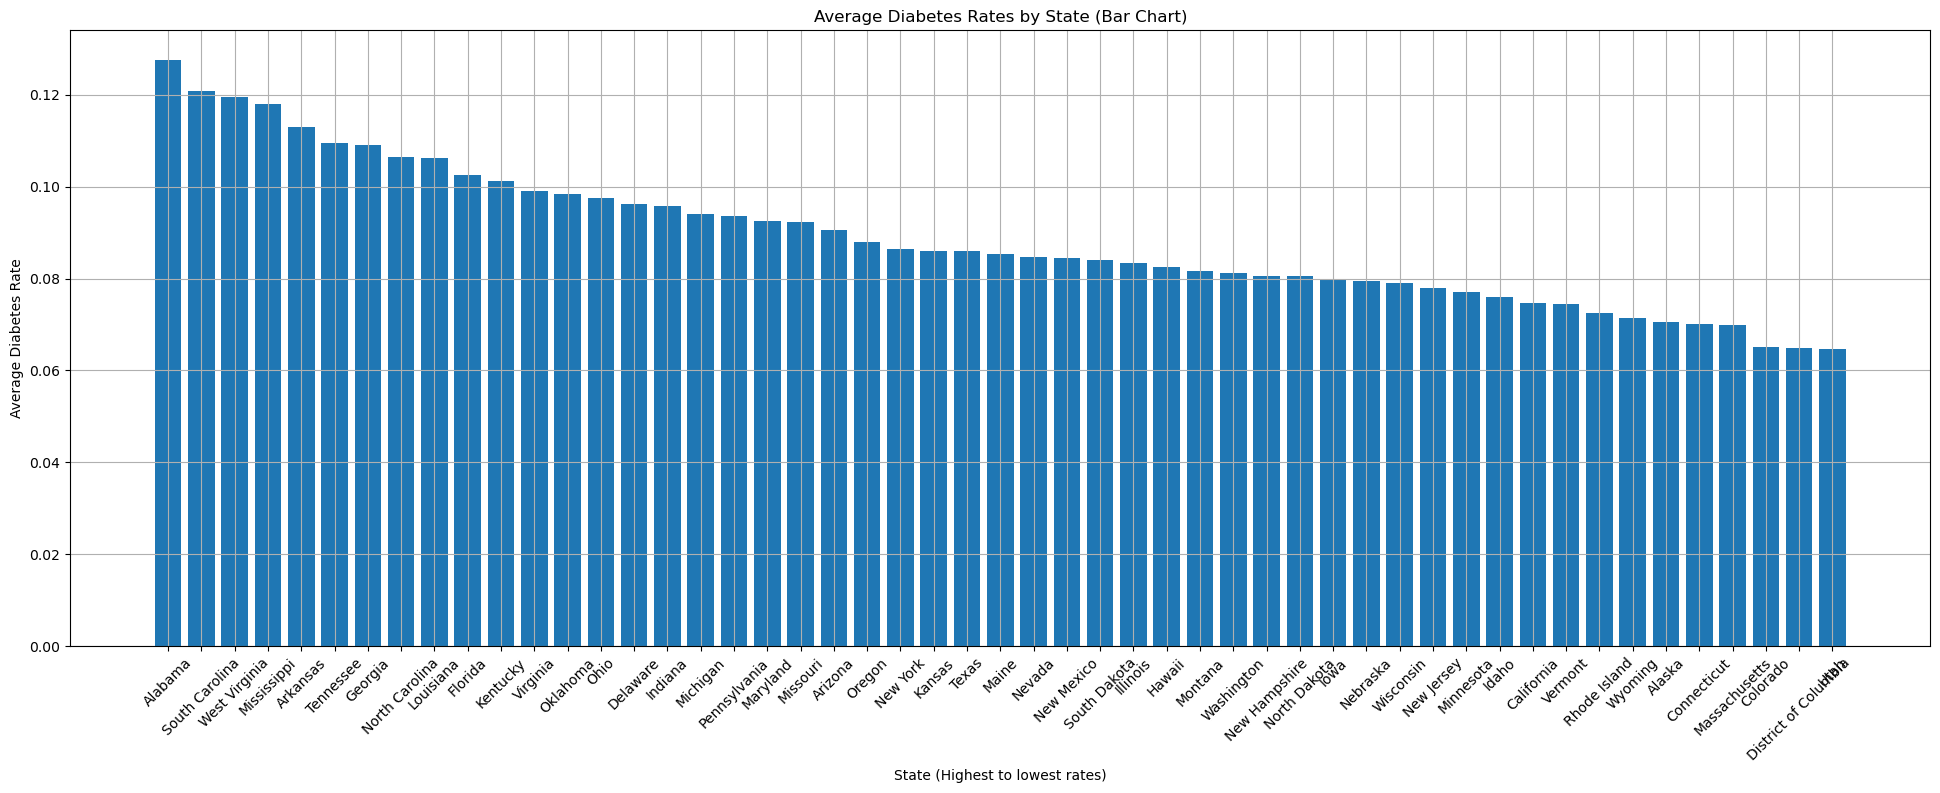

In [12]:
# find the avg diabetes rates for each state
state_diabetes = diabetes.groupby('State')['Diabetes_Number'].mean()
state_diabetes = state_diabetes.sort_values(ascending=False)

# Create a bar chart using Matplotlib
plt.figure(figsize=(24, 8))
plt.bar(state_diabetes.index, state_diabetes)
plt.title('Average Diabetes Rates by State (Bar Chart)')
plt.xlabel('State (Highest to lowest rates)')
plt.ylabel('Average Diabetes Rate')
plt.xticks(rotation=45)
plt.grid(True)

# plot
plt.show()

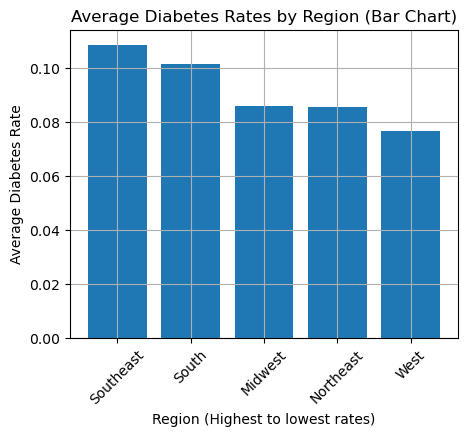

In [13]:
# find the avg diabetes rates for each region
region_diabetes = diabetes.groupby('Region')['Diabetes_Number'].mean()
region_diabetes = region_diabetes.sort_values(ascending=False)

# Create a bar chart using Matplotlib
plt.figure(figsize=(5, 4))
plt.bar(region_diabetes.index, region_diabetes)
plt.title('Average Diabetes Rates by Region (Bar Chart)')
plt.xlabel('Region (Highest to lowest rates)')
plt.ylabel('Average Diabetes Rate')
plt.xticks(rotation=45)
plt.grid(True)

# plot
plt.show()

### Here are some scatterplots which plot diabetes rates against race. My analysis: because most data points tend to be clustered near the nationwide or average (e.g. most regions are majority white), the legibility of these scatterplots is poor. It is difficult to interpret, but it appears as if there is a weak negative correlation between % of Whites and diabetes rates, a weak positive correlation between % of Blacks and diabetes rates, and a weak negative correlation between % of Hispanic/Latinos and diabetes rates.

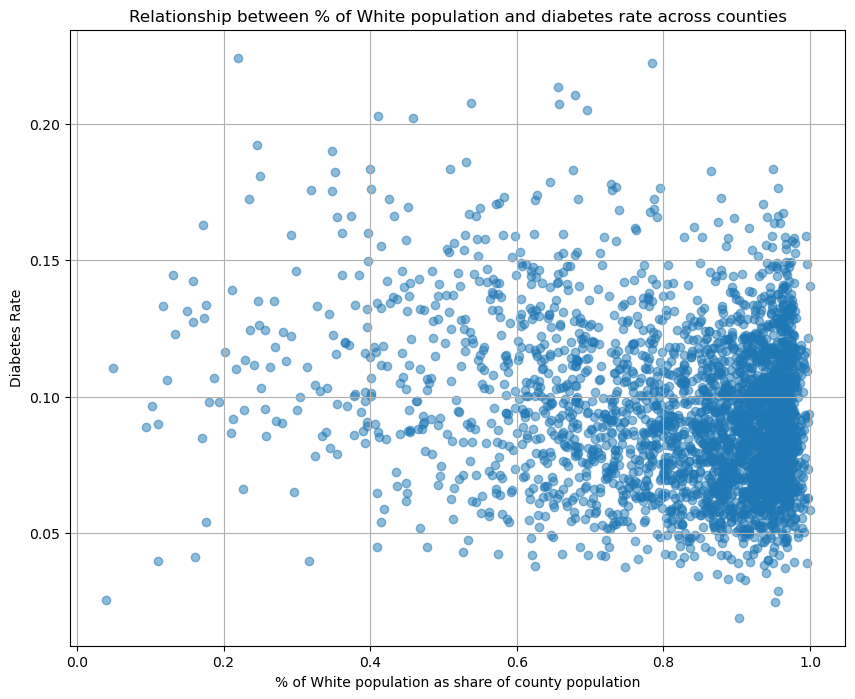

In [14]:
# create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(diabetes['race_total population_one race_white'], diabetes['Diabetes_Number'], alpha=0.5)
plt.title('Relationship between % of White population and diabetes rate across counties')
plt.xlabel('% of White population as share of county population')
plt.ylabel('Diabetes Rate')
plt.grid(True)

# plot 
plt.show()

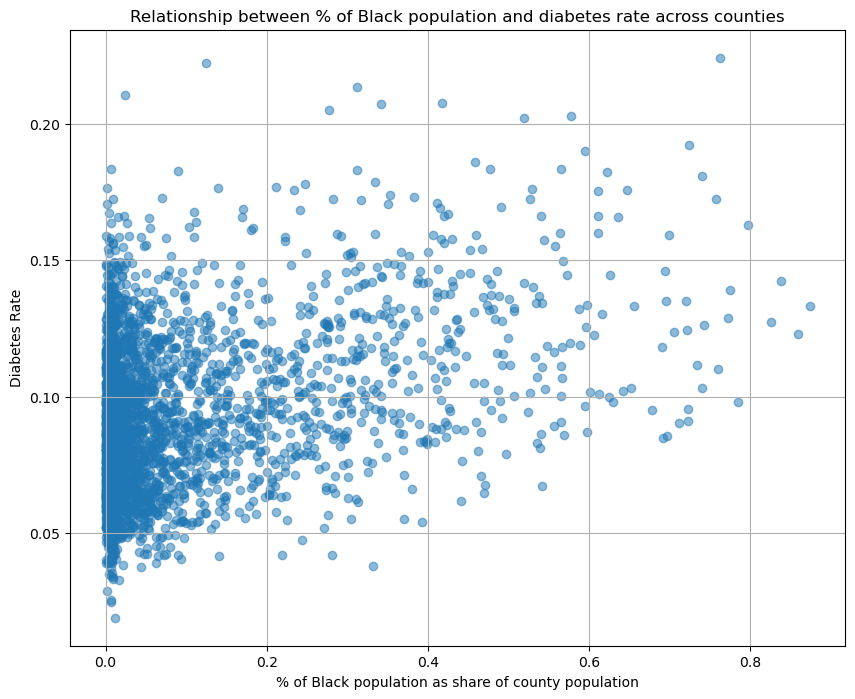

In [15]:
# create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(diabetes['race_total population_one race_black or african american'], diabetes['Diabetes_Number'], alpha=0.5)
plt.title('Relationship between % of Black population and diabetes rate across counties')
plt.xlabel('% of Black population as share of county population')
plt.ylabel('Diabetes Rate')
plt.grid(True)

# plot 
plt.show()

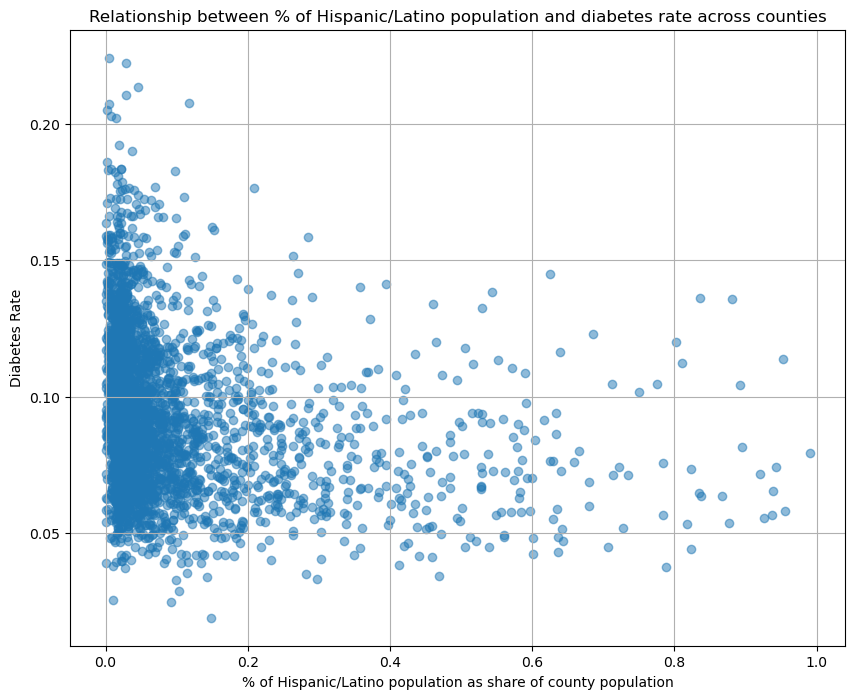

In [16]:
# create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(diabetes['hispanic or latino and race_total population_hispanic or latino (of any race)'], diabetes['Diabetes_Number'], alpha=0.5)
plt.title('Relationship between % of Hispanic/Latino population and diabetes rate across counties')
plt.xlabel('% of Hispanic/Latino population as share of county population')
plt.ylabel('Diabetes Rate')
plt.grid(True)

# plot 
plt.show()

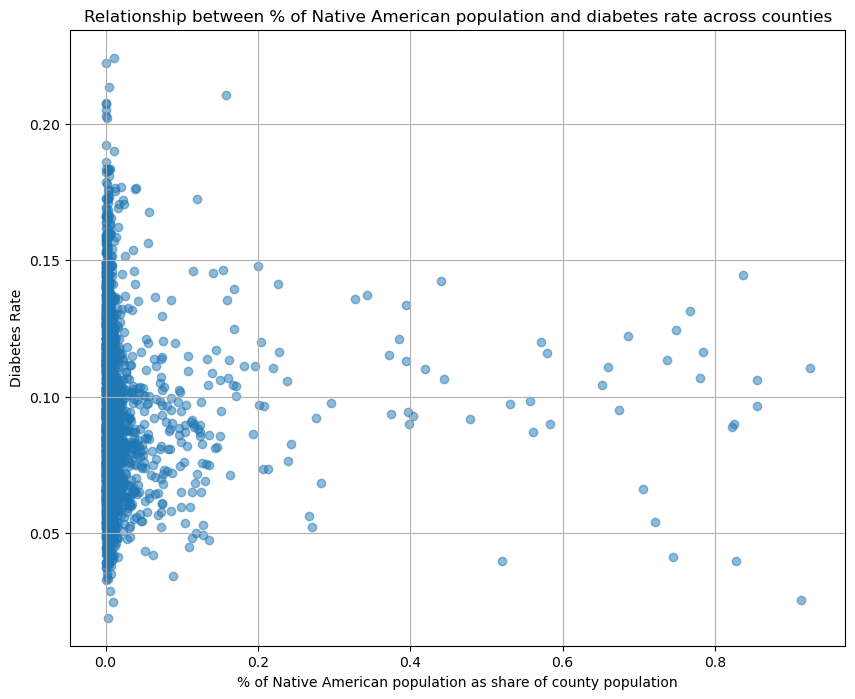

In [17]:
# create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(diabetes['race_total population_one race_american indian and alaska native'], diabetes['Diabetes_Number'], alpha=0.5)
plt.title('Relationship between % of Native American population and diabetes rate across counties')
plt.xlabel('% of Native American population as share of county population')
plt.ylabel('Diabetes Rate')
plt.grid(True)

# plot 
plt.show()

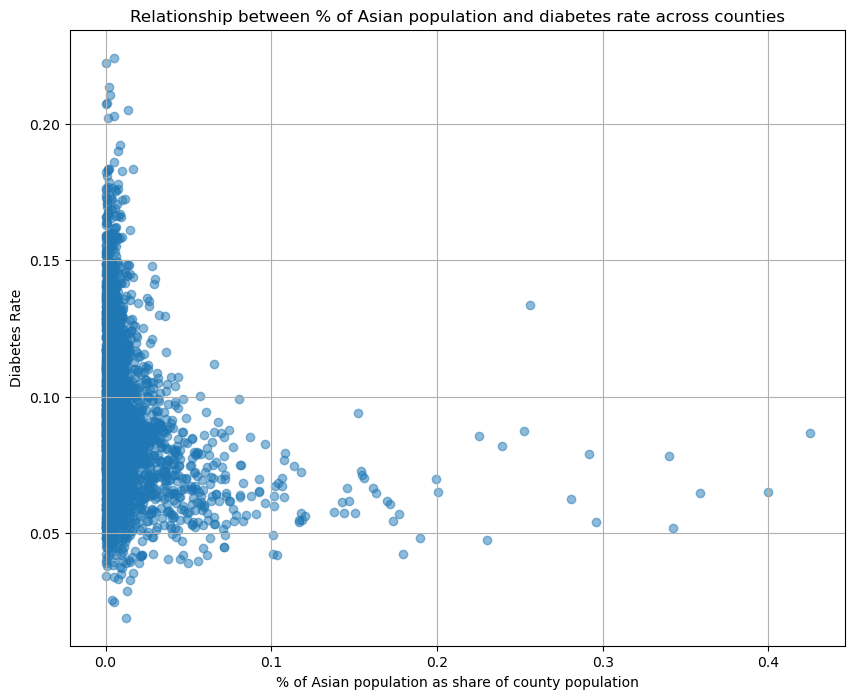

In [18]:
# create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(diabetes['race_total population_one race_asian'], diabetes['Diabetes_Number'], alpha=0.5)
plt.title('Relationship between % of Asian population and diabetes rate across counties')
plt.xlabel('% of Asian population as share of county population')
plt.ylabel('Diabetes Rate')
plt.grid(True)

# plot 
plt.show()

### Here are some scatterplots which plot diabetes rates against age. 

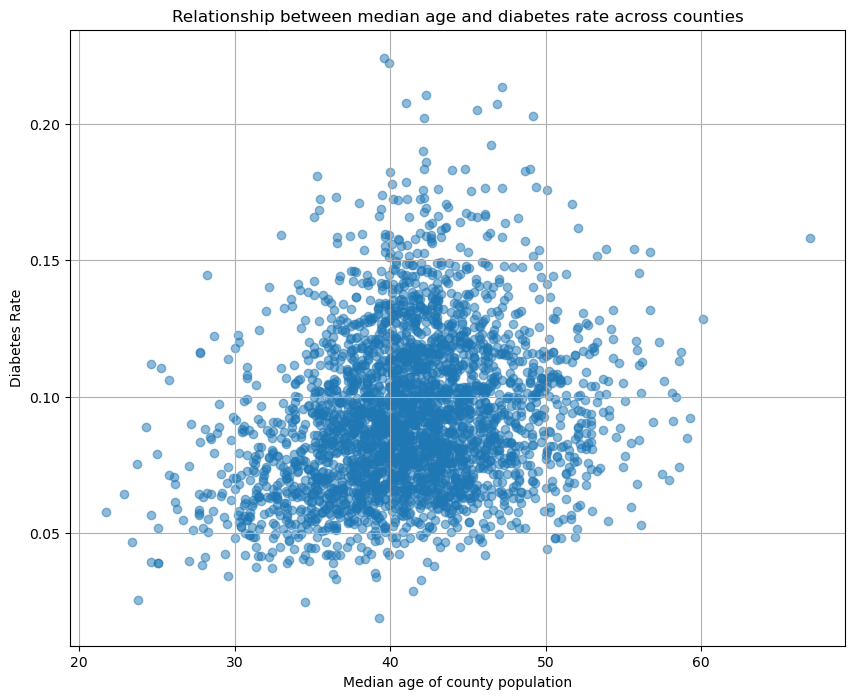

In [19]:
# create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(diabetes['sex and age_total population_median age (years)']*diabetes['race_total population'], diabetes['Diabetes_Number'], alpha=0.5)
plt.title('Relationship between median age and diabetes rate across counties')
plt.xlabel('Median age of county population')
plt.ylabel('Diabetes Rate')
plt.grid(True)

# plot
plt.show()

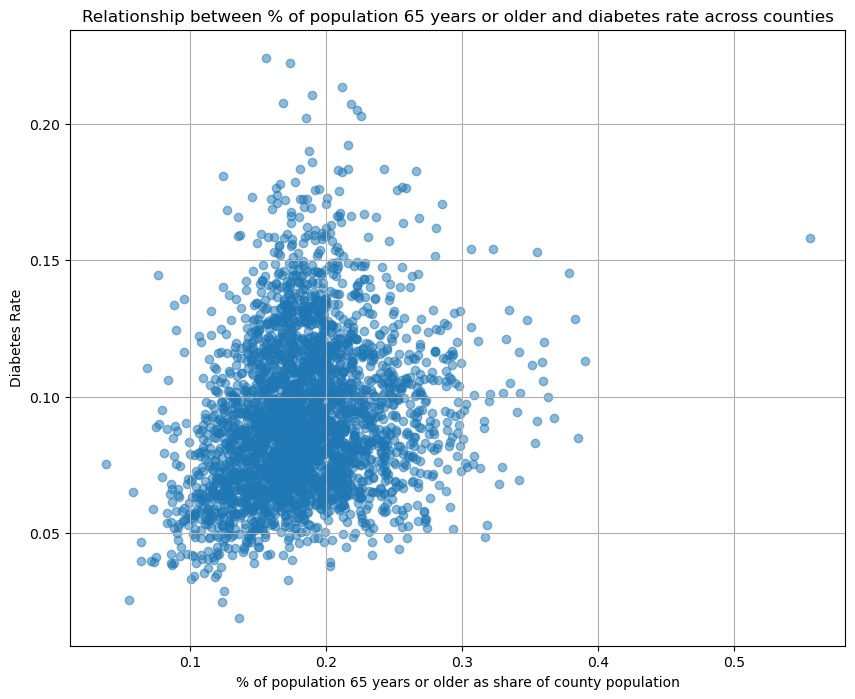

In [20]:
# create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(diabetes['sex and age_total population_65 years and over'], diabetes['Diabetes_Number'], alpha=0.5)
plt.title('Relationship between % of population 65 years or older and diabetes rate across counties')
plt.xlabel('% of population 65 years or older as share of county population')
plt.ylabel('Diabetes Rate')
plt.grid(True)

# plot 
plt.show()

# Part 3: Preparing to Fit Models

### 3.1 Finalizing Data Set

In [21]:

# drop and get dummies
# create dummy features out of 'Region', which might be related to diabetes rates 

diabetes_clean = pd.get_dummies(diabetes, 
                               columns = ['Region'],  
                               drop_first = True) # drop the first as a reference 

# drop 'County' and 'State' variables
diabetes_clean = diabetes_clean.drop(labels = ['County', 'State'],
                               axis = 1) # which axis tells python we want to drop columns rather than index rows?

# look at first 10 rows of new data frame 
diabetes_clean.head(10)

CountyFIPS  Diabetes_Number  Obesity_Number  Physical_Inactivity_Number  \
0        1001         0.093804        0.244366                    0.226902   
1        1003         0.080281        0.233255                    0.192324   
2        1005         0.131875        0.310643                    0.210651   
3        1007         0.105251        0.290052                    0.258667   
4        1009         0.108977        0.246804                    0.249198   
5        1011         0.224208        0.353748                    0.321967   
6        1013         0.145318        0.349513                    0.300974   
7        1015         0.127648        0.298580                    0.234140   
8        1017         0.141518        0.324425                    0.220570   
9        1019         0.122848        0.300429                    0.237342   

   sex and age_total population_65 years and over_sex ratio (males per 100 females)  \
0                                               76.5                                  
1                                               86.6                                  
2                                               76.2                                  
3                                               80.5                                  
4                                               79.7                                  
5                                               73.6                                  
6                                               69.1                                  
7                                               73.7                                  
8                                               73.3                                  
9                                               86.7                                  

   race_total population  race_total population_one race  \
0                  55200                        0.981341   
1                 208107                        0.982836   
2                  25782                        0.986308   
3                  22527                        0.991699   
4                  57645                        0.983780   
5                  10352                        1.000000   
6                  20025                        0.983870   
7                 115098                        0.976229   
8                  33826                        0.989742   
9                  25853                        0.991955   

   race_total population_two or more races  \
0                                 0.018659   
1                                 0.017164   
2                                 0.013692   
3                                 0.008301   
4                                 0.016220   
5                                 0.000000   
6                                 0.016130   
7                                 0.023771   
8                                 0.010258   
9                                 0.008045   

   race_total population_one race_white  \
0                              0.768786   
1                              0.862662   
2                              0.473819   
3                              0.766547   
4                              0.955052   
5                              0.219861   
6                              0.520050   
7                              0.743349   
8                              0.575977   
9                              0.928209   

   race_total population_one race_black or african american  \
0                                           0.191395          
1                                           0.094970          
2                                           0.475758          
3                                           0.222755          
4                                           0.014954          
5                                           0.762461          
6                                           0.452185          
7                                       

### 3.2 Partition Data, Feature Selection, and Standardization

In [22]:
# import library
from sklearn.model_selection import train_test_split

# create y dataframe 
y = diabetes_clean['Diabetes_Number']

# create X dataframe (include everything except "Diabetes_Number", our target, 
# and "race alone or in combination with one or more other races_total population")
diabetes_features = diabetes_clean.drop(['Diabetes_Number', 'race alone or in combination with one or more other races_total population'], axis=1)
X = diabetes_features

# split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X,               # specify features  
                                                    y,               # specify labels
                                                    train_size=0.80, # set training proportional spilt
                                                    test_size=0.20)  # set testing proportional spilt

# split training set into training and validation sets
X_train, X_validate, y_train, y_validate = train_test_split(X_train,         # specify training x
                                                            y_train,         # specify training y
                                                            train_size=0.75, # set training proportional spilt
                                                            test_size=0.25)  # set testing proportional split

# print shape of each newly created dataframe
print("Shape of X train is", X_train.shape)
print("Shape of X_validate is", X_validate.shape)
print("Shape of X_test is", X_test.shape)
print("\n")

# verify proportional splits
print("100% of original dataset:", X.shape[0])
print("60% of full dataset:", X.shape[0]*.6)
print("20% of full dataset:", X.shape[0]*.2)

Shape of X train is (1866, 89)
Shape of X_validate is (623, 89)
Shape of X_test is (623, 89)


100% of original dataset: 3112
60% of full dataset: 1867.1999999999998
20% of full dataset: 622.4000000000001


### To justify my feature selection, the only features I was confident I should remove were related to female specific variables, because they would be perfectly collinear with the male specific variables, being N-1 from the total population. As a result, I was concerned they might cause issues with the linear regression.

In [23]:
# some feature selection
# i'll remove the female specific variables, because we already have male specific variables.
# female and male vars are linearly dependent, which would lead to perfect multicollinearity, causing issues in the regression 

dropped_features = ['citizen -  voting age population_citizen -  18 and over population_female', 
                    'sex and age_total population_female',
                    'sex and age_total population_18 years and over_female',
                    'sex and age_total population_65 years and over_female',
                   ]

diabetes_features = diabetes_features.drop(dropped_features, axis=1)

In [24]:
# Given that we want to only standardize non-dichotomous variables, we need to find a 
# solution that will loop over only the columns we want to standardize. The code below
# identifies all non-dichotomous variables in our dataset and only standardizes those.

# load library and create instance of Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# identify non-dichotomous columns we want to transform
columns = list(X_test.select_dtypes(include=['number']).loc[:, X_test.nunique() > 2])

# use loop to transform training data for only columns we want to transform
for column in columns:
    X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1)).flatten()

# use loop to transform validation data for only columns we want to transform
for column in columns:
    X_validate[column] = scaler.fit_transform(X_validate[column].values.reshape(-1, 1)).flatten()

# use loop to transform test data for only columns we want to transform
for column in columns:
    X_test[column] = scaler.fit_transform(X_test[column].values.reshape(-1, 1)).flatten()
    
# look at first 10 rows of new data frame 
diabetes_clean.head(10)

CountyFIPS  Diabetes_Number  Obesity_Number  Physical_Inactivity_Number  \
0        1001         0.093804        0.244366                    0.226902   
1        1003         0.080281        0.233255                    0.192324   
2        1005         0.131875        0.310643                    0.210651   
3        1007         0.105251        0.290052                    0.258667   
4        1009         0.108977        0.246804                    0.249198   
5        1011         0.224208        0.353748                    0.321967   
6        1013         0.145318        0.349513                    0.300974   
7        1015         0.127648        0.298580                    0.234140   
8        1017         0.141518        0.324425                    0.220570   
9        1019         0.122848        0.300429                    0.237342   

   sex and age_total population_65 years and over_sex ratio (males per 100 females)  \
0                                               76.5                                  
1                                               86.6                                  
2                                               76.2                                  
3                                               80.5                                  
4                                               79.7                                  
5                                               73.6                                  
6                                               69.1                                  
7                                               73.7                                  
8                                               73.3                                  
9                                               86.7                                  

   race_total population  race_total population_one race  \
0                  55200                        0.981341   
1                 208107                        0.982836   
2                  25782                        0.986308   
3                  22527                        0.991699   
4                  57645                        0.983780   
5                  10352                        1.000000   
6                  20025                        0.983870   
7                 115098                        0.976229   
8                  33826                        0.989742   
9                  25853                        0.991955   

   race_total population_two or more races  \
0                                 0.018659   
1                                 0.017164   
2                                 0.013692   
3                                 0.008301   
4                                 0.016220   
5                                 0.000000   
6                                 0.016130   
7                                 0.023771   
8                                 0.010258   
9                                 0.008045   

   race_total population_one race_white  \
0                              0.768786   
1                              0.862662   
2                              0.473819   
3                              0.766547   
4                              0.955052   
5                              0.219861   
6                              0.520050   
7                              0.743349   
8                              0.575977   
9                              0.928209   

   race_total population_one race_black or african american  \
0                                           0.191395          
1                                           0.094970          
2                                           0.475758          
3                                           0.222755          
4                                           0.014954          
5                                           0.762461          
6                                           0.452185          
7                                       

# Part 4: Training Models

### 4.1 Model Description

#### I am using OLS, Ridge, and LASSO. 

#### I am using OLS, or Ordinary Least Squares, regression because I want to familiarize myself with what is considered a widely and commonly used regression technique in the social sciences field. Whether or not it is the most effective, it will be useful to serve as a baseline to compare the other regression techniques against. Its pros include efficiency and interpretability, while its cons include the potential for overfitting or being sensitive to outliers/multicollinearity.

#### I am using LASSO because I believe that most of the features in my dataset are not relevant and I want to automatically select the most important features while shrinking the coefficients of the unimportant ones. LASSO's feature selection approach reduces the coefficients of less important features to exactly zero, effectively removing them from the model. This leads to a simpler and more interpretable model, as it retains only the features that are deemed relevant for prediction. However, LASSO can also sometimes over-prune the feature set, leading to models that are overly simplified and less accurate.

#### I am using Ridge regression to shrink coefficients of less important features toward zero, but not to exactly zero. Although I believe most features in my dataset are not relevant, I still want to account for the possibility that my intuition is incorrect, and Ridge is best suited for when most features are relevant. Additionally, Ridge can help stabilize coefficients when we have high multicollinearity, which might be the case given many of our features are shares of population totals. 

In [25]:
# import our regression libraries
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV

# use magic function
%matplotlib inline

# set style
sns.set_style("darkgrid")

###  4.2.1 OLS

In [26]:
# create a model
lin_reg = LinearRegression()

# fit the model
lin_model = lin_reg.fit(X_train, y_train)

# print model coefficients and intercept
# print(lin_model.coef_)
# print(lin_model.intercept_)

<Figure size 640x480 with 0 Axes>

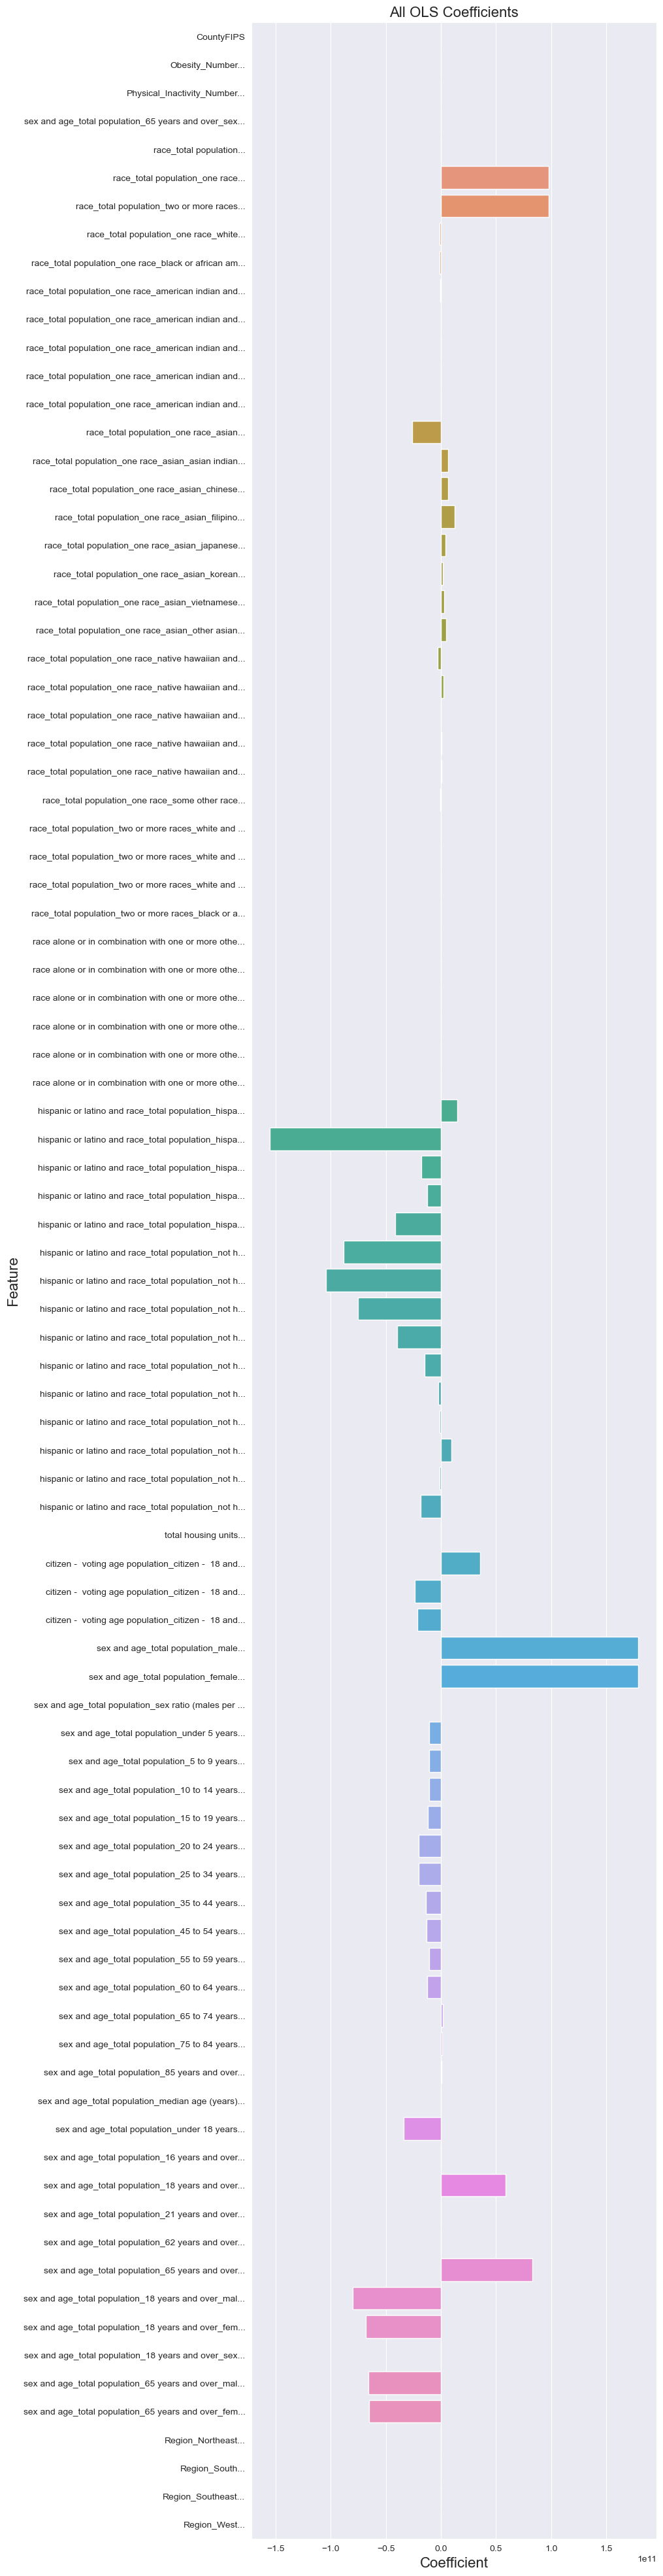

In [27]:
# set the figure and size
figure = plt.figure()
plt.figure(figsize=(8, 50)) 

# create a dataframe with the coefficient and feature names for plotting
lin_reg_data = pd.DataFrame([lin_model.coef_, X.columns]).T # make a dataframe from the arrays
lin_reg_data.columns = ['Coefficient', 'Feature']           # add column names for clarity

# plot
ax = sns.barplot(x="Coefficient",                           # add x 
                 y="Feature",                               # add y
                 data=lin_reg_data)                         # specify data

# set the title and axis label font sizes
ax.set_title("All OLS Coefficients", fontsize=16)                            # set title
ax.set_xlabel("Coefficient", fontsize=16) 
ax.set_ylabel("Feature", fontsize=16)  

# adjust tick font size and truncate long labels
new_labels = [label.get_text()[:50] + '...' if len(label.get_text()) > 10 else label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(new_labels, rotation=0, fontsize=10)

plt.show()                                                  # show plot

<Figure size 640x480 with 0 Axes>

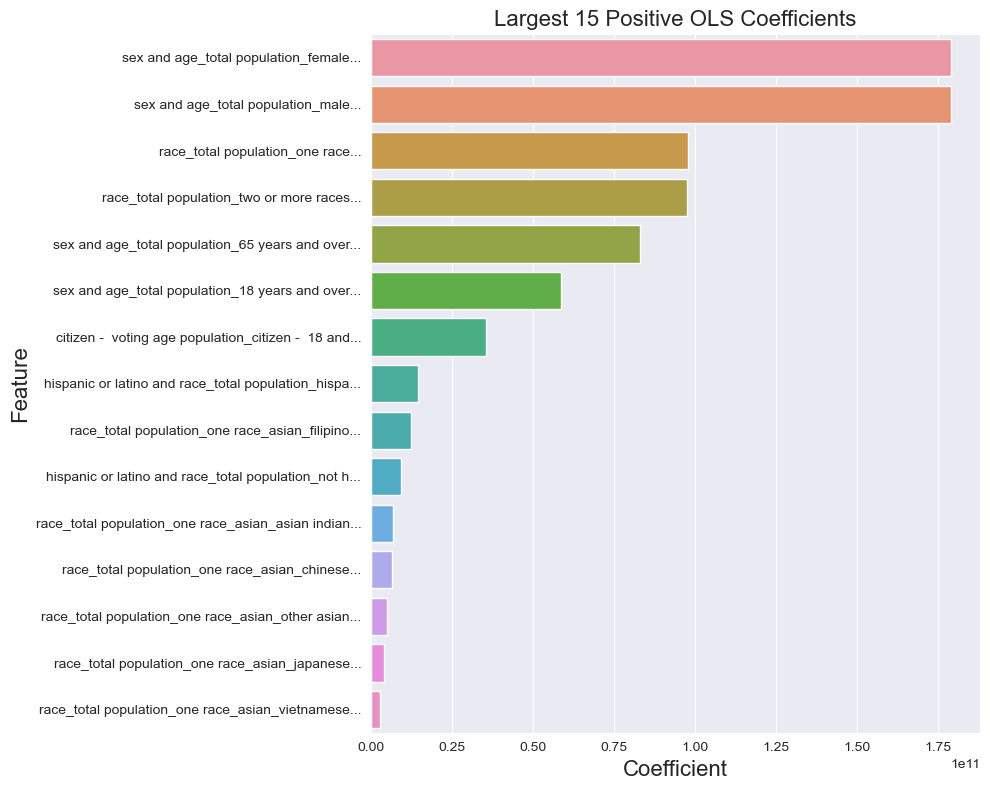

In [28]:
# set the figure and size
figure = plt.figure()
plt.figure(figsize=(10, 8)) 


# create a dataframe with the coefficient and feature names for plotting
lin_reg_data = pd.DataFrame([lin_model.coef_, X.columns]).T # make a dataframe from the arrays
lin_reg_data.columns = ['Coefficient', 'Feature']           # add column names for clarity


# sort features by coefficient values (highest to lowest)
lin_reg_data = lin_reg_data.sort_values(by='Coefficient', ascending=False)


# display the top N features
N = 15 
lin_reg_data = lin_reg_data.head(N)


# plot
ax = sns.barplot(x="Coefficient",                           # add x 
                 y="Feature",                               # add y
                 data=lin_reg_data)                         # specify data

# set the title and axis label font sizes
ax.set_title("Largest {} Positive OLS Coefficients".format(N), fontsize=16)
ax.set_xlabel("Coefficient", fontsize=16) 
ax.set_ylabel("Feature", fontsize=16)  

# adjust tick font size and truncate long labels
new_labels = [label.get_text()[:50] + '...' if len(label.get_text()) > 10 else label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(new_labels, rotation=0, fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

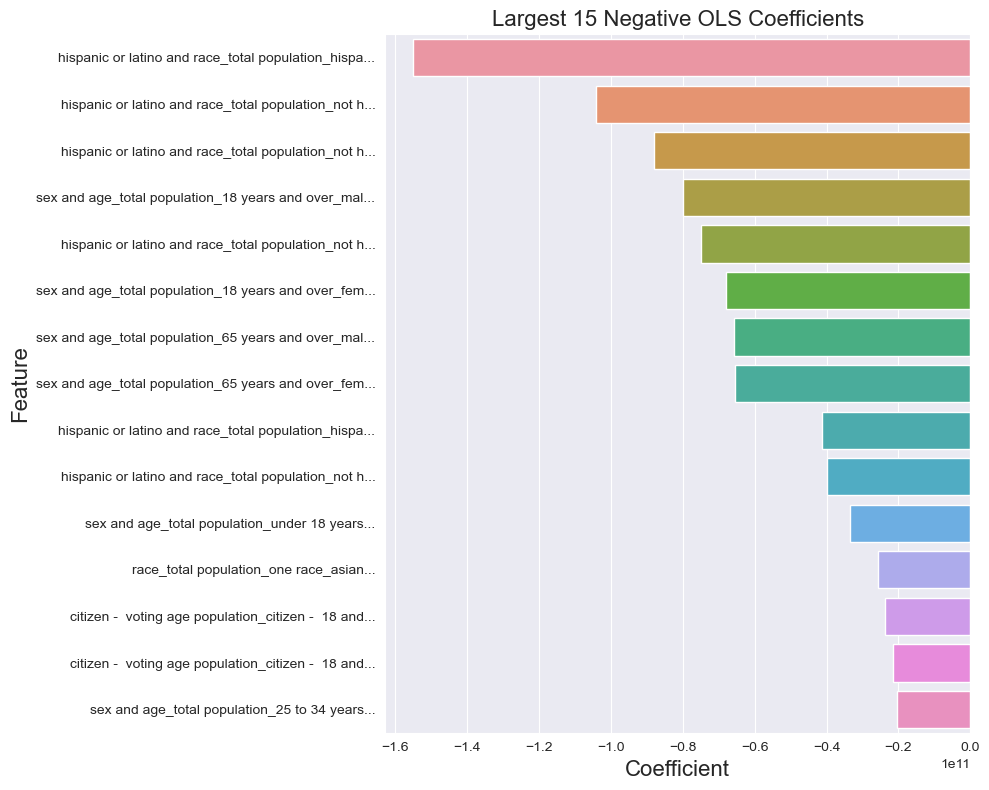

In [29]:
# set the figure and size
figure = plt.figure()
plt.figure(figsize=(10, 8)) 


# create a dataframe with the coefficient and feature names for plotting
lin_reg_data = pd.DataFrame([lin_model.coef_, X.columns]).T # make a dataframe from the arrays
lin_reg_data.columns = ['Coefficient', 'Feature']           # add column names for clarity


# sort features by coefficient values (highest to lowest)
lin_reg_data = lin_reg_data.sort_values(by='Coefficient', ascending=True)


# display the top N features
N = 15 
lin_reg_data = lin_reg_data.head(N)


# plot
ax = sns.barplot(x="Coefficient",                           # add x 
                 y="Feature",                               # add y
                 data=lin_reg_data)                         # specify data

# set the title and axis label font sizes
ax.set_title("Largest {} Negative OLS Coefficients".format(N), fontsize=16)
ax.set_xlabel("Coefficient", fontsize=16) 
ax.set_ylabel("Feature", fontsize=16)  


# adjust tick font size and truncate long labels
new_labels = [label.get_text()[:50] + '...' if len(label.get_text()) > 10 else label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(new_labels, rotation=0, fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

### 4.2.2 Ridge

In [30]:
# create and fit the model
ridge_reg = Ridge()                                              # create the model
ridge_model = ridge_reg.fit(X_train, y_train)                    # fit the model


# create a dataframe with the coefficient and feature names for plotting
ridge_reg_data = pd.DataFrame([ridge_model.coef_, X.columns]).T  # create a dataframe from the estimates
ridge_reg_data.columns = ['Coefficient', 'Feature']              # add column names for clarity

<Figure size 640x480 with 0 Axes>

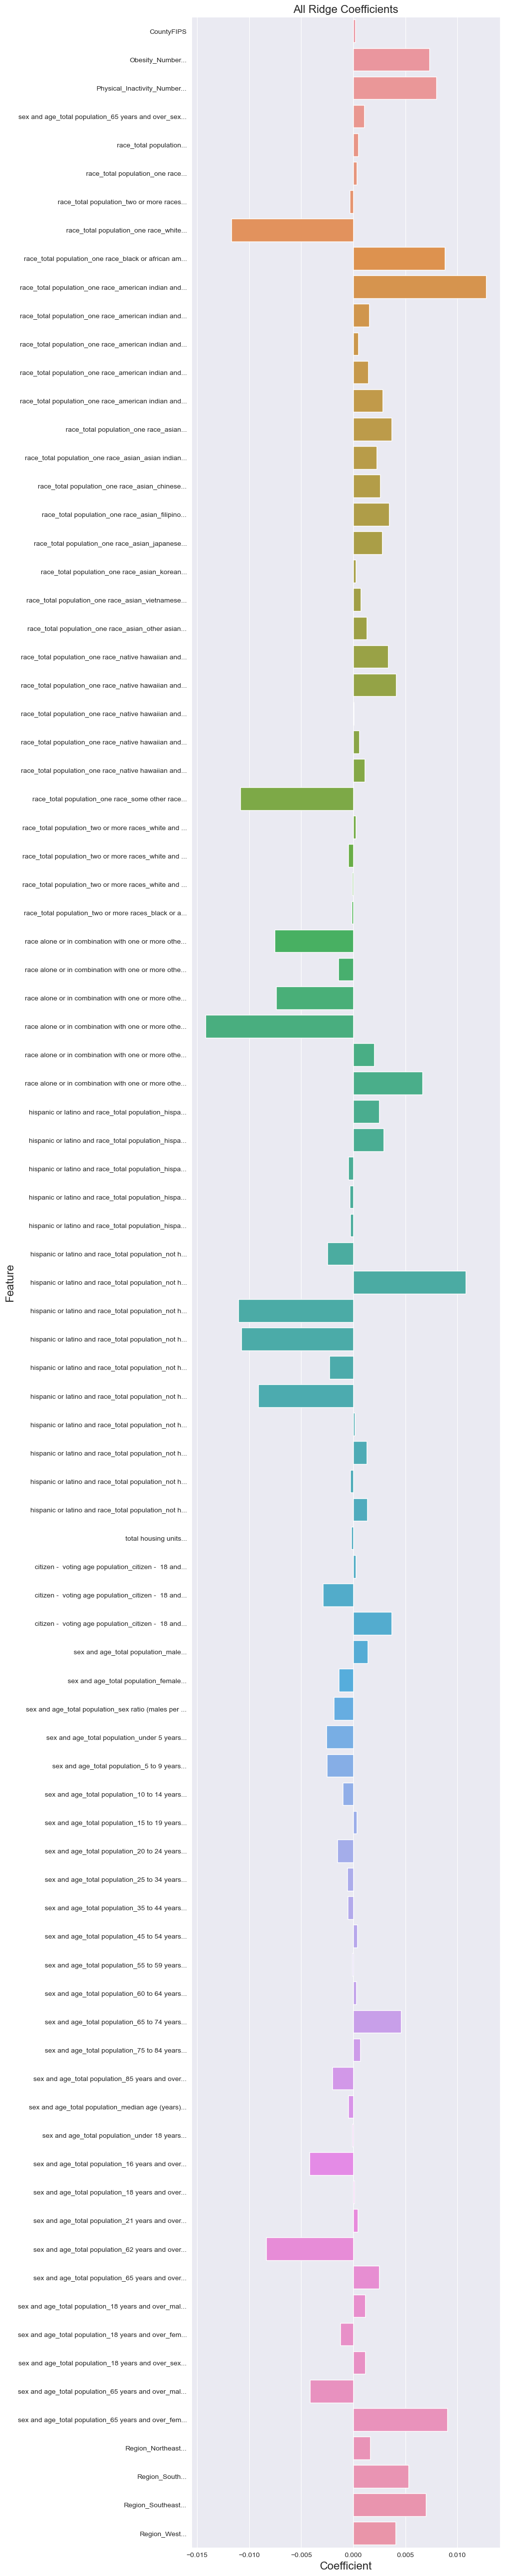

In [31]:
# set the figure and size
figure = plt.figure()
plt.figure(figsize=(8, 66)) 

# create a dataframe with the coefficient and feature names for plotting
ridge_reg_data = pd.DataFrame([ridge_model.coef_, X.columns]).T # make a dataframe from the arrays
ridge_reg_data.columns = ['Coefficient', 'Feature']           # add column names for clarity

# plot
ax = sns.barplot(x="Coefficient",                           # add x 
                 y="Feature",                               # add y
                 data=ridge_reg_data)                         # specify data

# set the title and axis label font sizes
ax.set_title("All Ridge Coefficients", fontsize=16)                            # set title
ax.set_xlabel("Coefficient", fontsize=16) 
ax.set_ylabel("Feature", fontsize=16)  

# adjust tick font size and truncate long labels
new_labels = [label.get_text()[:50] + '...' if len(label.get_text()) > 10 else label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(new_labels, rotation=0, fontsize=10)

plt.show()                                                  # show plot

<Figure size 640x480 with 0 Axes>

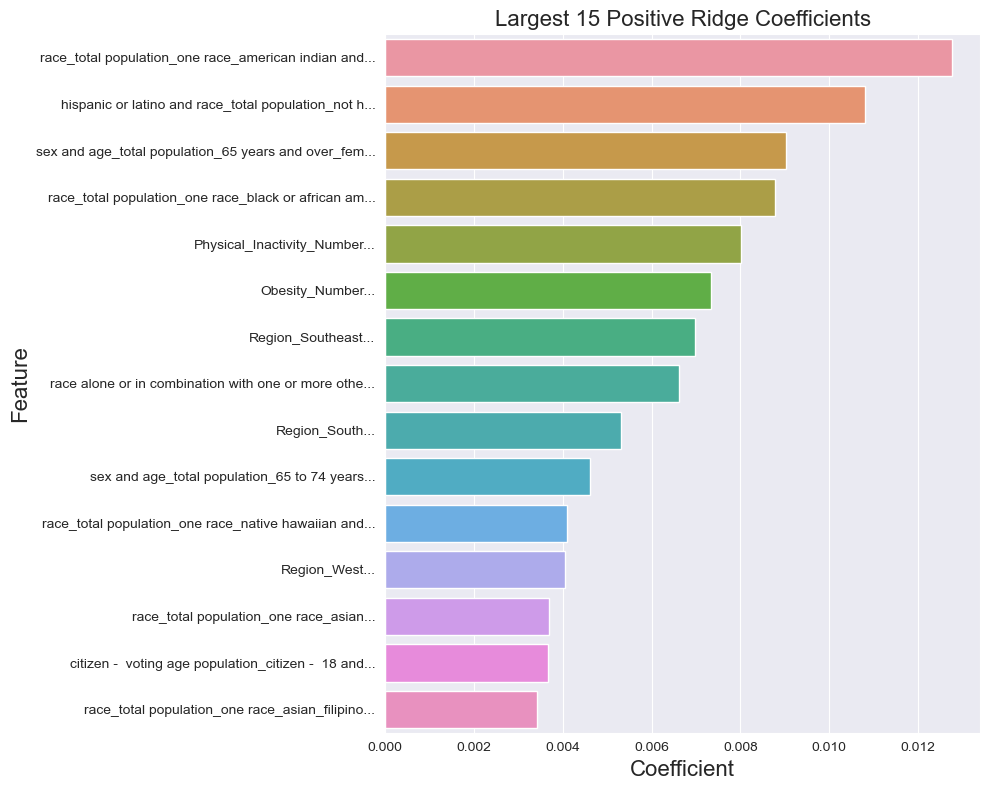

In [32]:
# set the figure and size
figure = plt.figure()
plt.figure(figsize=(10, 8)) 


# create a dataframe with the coefficient and feature names for plotting
ridge_reg_data = pd.DataFrame([ridge_model.coef_, X.columns]).T # make a dataframe from the arrays
ridge_reg_data.columns = ['Coefficient', 'Feature']           # add column names for clarity


# sort features by coefficient values (highest to lowest)
ridge_reg_data = ridge_reg_data.sort_values(by='Coefficient', ascending=False)


# display the top N features
N = 15 
ridge_reg_data = ridge_reg_data.head(N)


# plot
ax = sns.barplot(x="Coefficient",                           # add x 
                 y="Feature",                               # add y
                 data=ridge_reg_data)                         # specify data

# set the title and axis label font sizes
ax.set_title("Largest {} Positive Ridge Coefficients".format(N), fontsize=16)
ax.set_xlabel("Coefficient", fontsize=16) 
ax.set_ylabel("Feature", fontsize=16)  

# adjust tick font size and truncate long labels
new_labels = [label.get_text()[:50] + '...' if len(label.get_text()) > 10 else label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(new_labels, rotation=0, fontsize=10)


# Display the plot
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

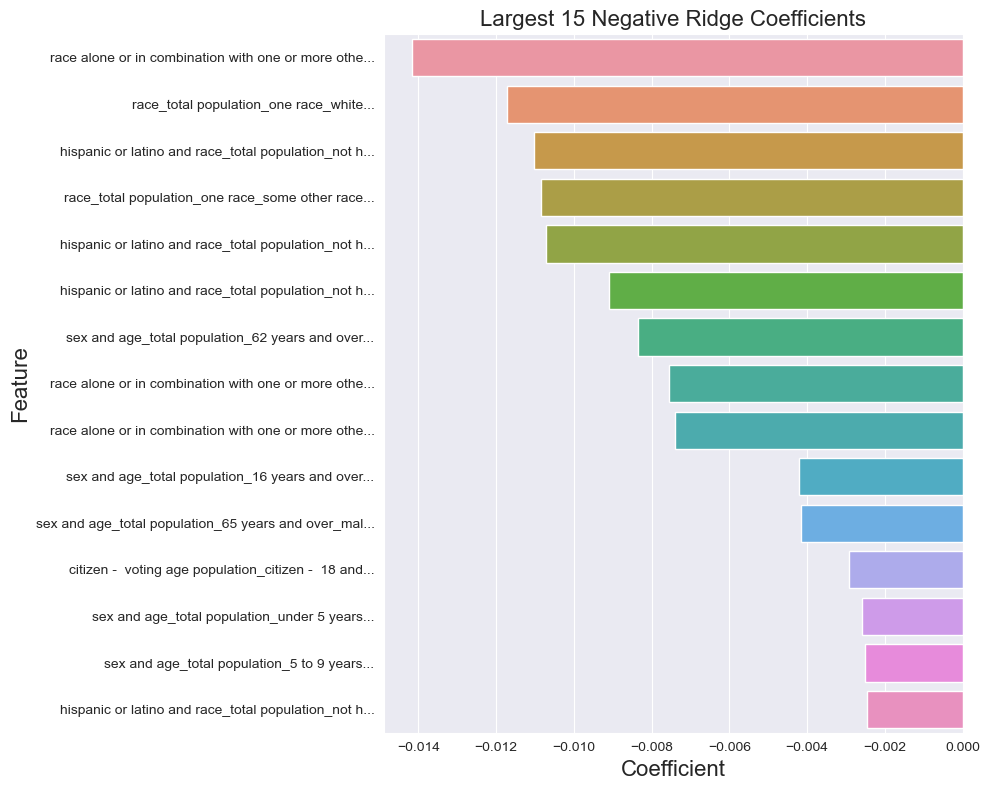

In [33]:
# set the figure and size
figure = plt.figure()
plt.figure(figsize=(10, 8)) 


# create a dataframe with the coefficient and feature names for plotting
ridge_reg_data = pd.DataFrame([ridge_model.coef_, X.columns]).T # make a dataframe from the arrays
ridge_reg_data.columns = ['Coefficient', 'Feature']           # add column names for clarity


# sort features by coefficient values (highest to lowest)
ridge_reg_data = ridge_reg_data.sort_values(by='Coefficient', ascending=True)


# display the top N features
N = 15 
ridge_reg_data = ridge_reg_data.head(N)


# plot
ax = sns.barplot(x="Coefficient",                           # add x 
                 y="Feature",                               # add y
                 data=ridge_reg_data)                         # specify data

# set the title and axis label font sizes
ax.set_title("Largest {} Negative Ridge Coefficients".format(N), fontsize=16)
ax.set_xlabel("Coefficient", fontsize=16) 
ax.set_ylabel("Feature", fontsize=16)  

# adjust tick font size and truncate long labels
new_labels = [label.get_text()[:50] + '...' if len(label.get_text()) > 10 else label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(new_labels, rotation=0, fontsize=10)


# Display the plot
plt.tight_layout()
plt.show()

### 4.2.3 LASSO

In [34]:
# create and fit the model
lasso_reg = Lasso(alpha=0.001) 
lasso_model = lasso_reg.fit(X_train, 
                            y_train)

# Create a dataframe with the coefficient values and feature names
lasso_coef = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lasso_reg.coef_})

# Sort the features by absolute coefficient values
lasso_coef['Absolute_Coefficient'] = abs(lasso_coef['Coefficient'])
lasso_coef = lasso_coef.sort_values(by='Absolute_Coefficient', ascending=False)

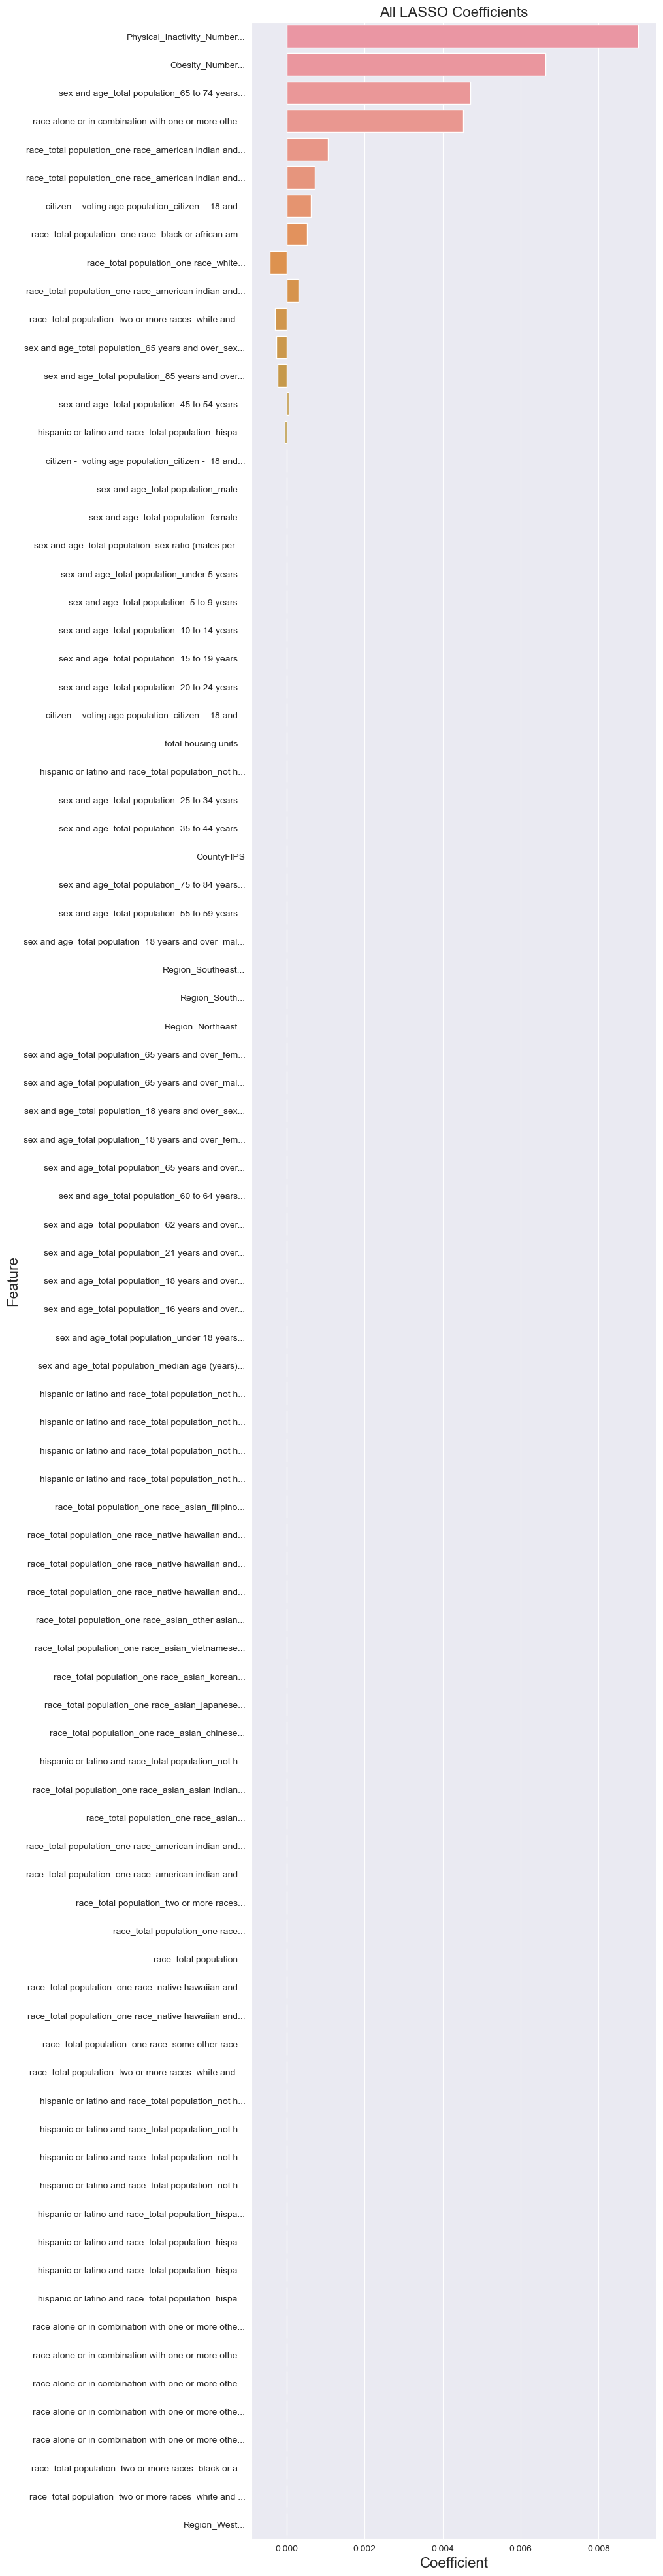

In [35]:
# Set the figure size
plt.figure(figsize=(8, 50))

# Create a bar plot to visualize the coefficients
ax = sns.barplot(x='Coefficient', y='Feature', data=lasso_coef)
ax.set_title('Lasso Coefficients')

# set the title and axis label font sizes
ax.set_title("All LASSO Coefficients".format(N), fontsize=16)
ax.set_xlabel("Coefficient", fontsize=16) 
ax.set_ylabel("Feature", fontsize=16)  

# adjust tick font size and truncate long labels
new_labels = [label.get_text()[:50] + '...' if len(label.get_text()) > 10 else label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(new_labels, rotation=0, fontsize=10)

# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

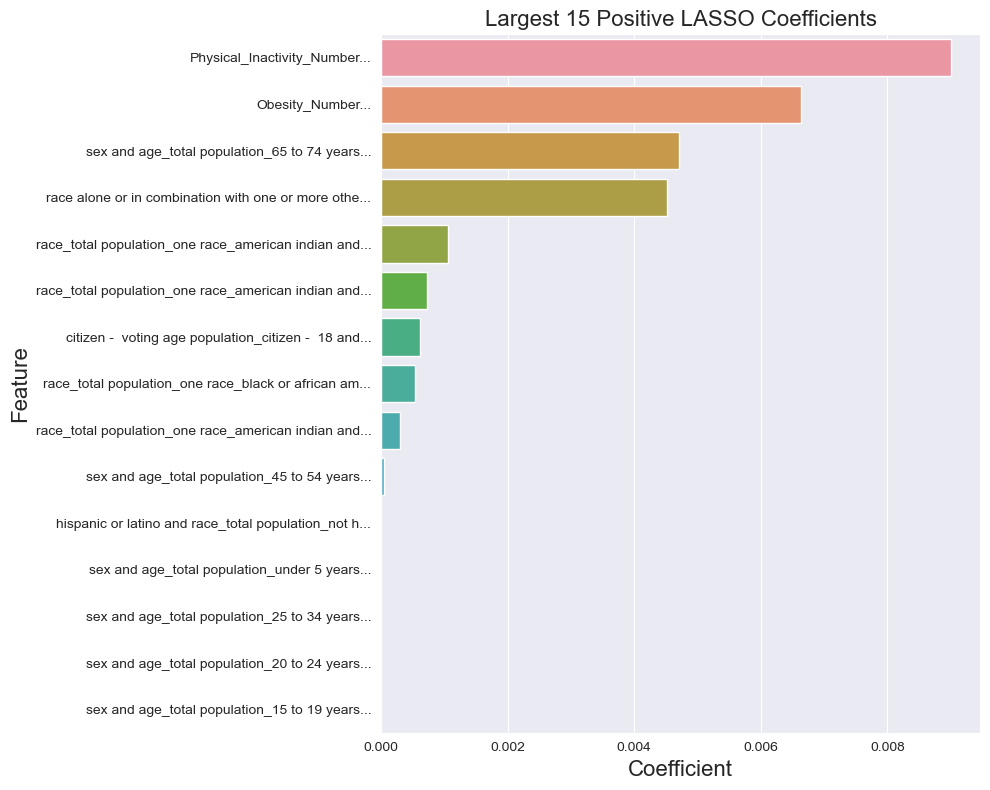

In [36]:
# set the figure and size
figure = plt.figure()
plt.figure(figsize=(10, 8)) 


# create a dataframe with the coefficient and feature names for plotting
lasso_reg_data = pd.DataFrame([lasso_model.coef_, X.columns]).T # make a dataframe from the arrays
lasso_reg_data.columns = ['Coefficient', 'Feature']           # add column names for clarity


# sort features by coefficient values (highest to lowest)
lasso_reg_data = lasso_reg_data.sort_values(by='Coefficient', ascending=False)


# display the top N features
N = 15 
lasso_reg_data = lasso_reg_data.head(N)


# plot
ax = sns.barplot(x="Coefficient",                           # add x 
                 y="Feature",                               # add y
                 data=lasso_reg_data)                         # specify data

# set the title and axis label font sizes
ax.set_title("Largest {} Positive LASSO Coefficients".format(N), fontsize=16)
ax.set_xlabel("Coefficient", fontsize=16) 
ax.set_ylabel("Feature", fontsize=16)  

# adjust tick font size and truncate long labels
new_labels = [label.get_text()[:50] + '...' if len(label.get_text()) > 10 else label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(new_labels, rotation=0, fontsize=10)


# Display the plot
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

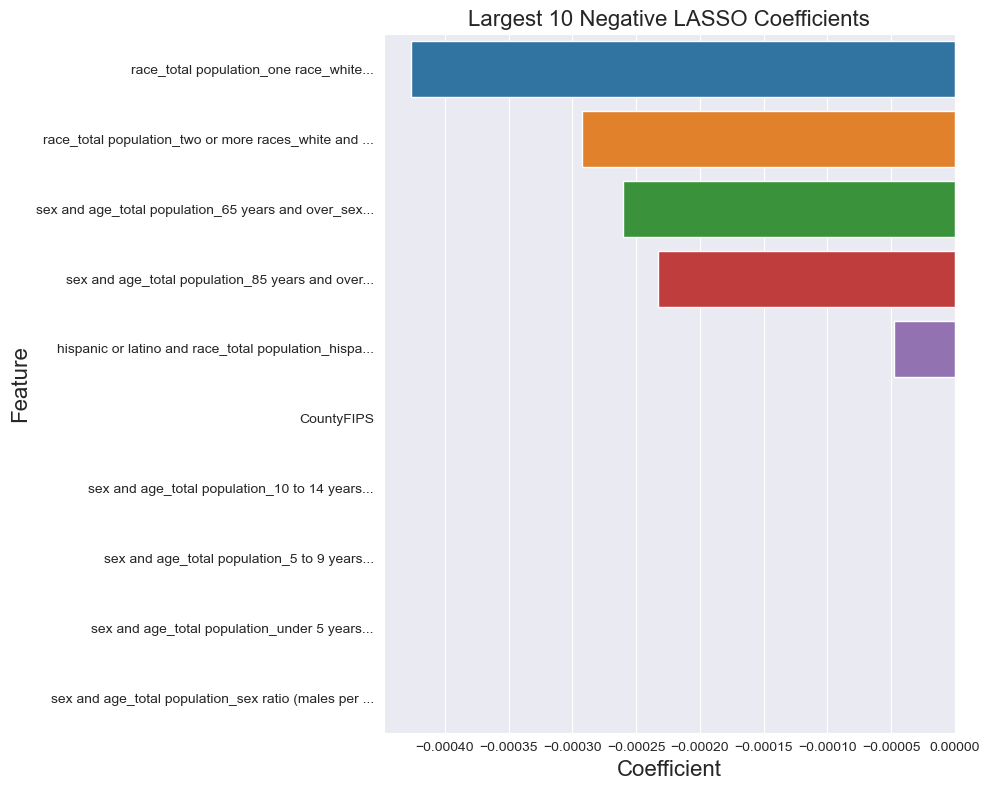

In [37]:
# set the figure and size
figure = plt.figure()
plt.figure(figsize=(10, 8)) 


# create a dataframe with the coefficient and feature names for plotting
lasso_reg_data = pd.DataFrame([lasso_model.coef_, X.columns]).T # make a dataframe from the arrays
lasso_reg_data.columns = ['Coefficient', 'Feature']           # add column names for clarity


# sort features by coefficient values (highest to lowest)
lasso_reg_data = lasso_reg_data.sort_values(by='Coefficient', ascending=True)


# display the top N features
N = 10 
lasso_reg_data = lasso_reg_data.head(N)


# plot
ax = sns.barplot(x="Coefficient",                           # add x 
                 y="Feature",                               # add y
                 data=lasso_reg_data)                         # specify data

# set the title and axis label font sizes
ax.set_title("Largest {} Negative LASSO Coefficients".format(N), fontsize=16)
ax.set_xlabel("Coefficient", fontsize=16) 
ax.set_ylabel("Feature", fontsize=16)  

# adjust tick font size and truncate long labels
new_labels = [label.get_text()[:50] + '...' if len(label.get_text()) > 10 else label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(new_labels, rotation=0, fontsize=10)


# Display the plot
plt.tight_layout()
plt.show()

# Part 5: Validating and Refining Models

## 5.1 Predict on Validation Set -- Tuning Hyperparameters

In [38]:
# create function to calculate the root mean squared errror
def rmse(pred, actual):
    return np.sqrt(np.mean((pred-actual)**2))

In [39]:
# see parameters for linear regression
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [40]:
# see parameters for Ridge regression
ridge_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [41]:
# see parameters for Lasso regression
lasso_reg.get_params()

{'alpha': 0.001,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [42]:
# Linear regression 

# specify the hyperparameters
param_grid = {'fit_intercept': [True, False]}          # use dictionary for tuning

# execute the grid search
lin_grid_reg = GridSearchCV(estimator  = lin_reg,      # model to be tuned
                            param_grid = param_grid,   # parameters to be searched as specified above
                            cv=3)                      # 3-fold cross-validation to be used during hypertuning

# now fit the tuning on the training data
lin_grid_reg.fit(X_train, y_train)

# select the best performing model and predict with that on validation dataset 
best_index = np.argmax(lin_grid_reg.cv_results_["mean_test_score"])  # find the best performing model
best_lin_pred = lin_grid_reg.best_estimator_.predict(X_validate)     # find best estimator and predict on validation set

# print the results  
print(lin_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lin_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lin_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lin_pred, y_validate))


#from sklearn.metrics import mean_squared_error
#lin_pred = lin_model.predict(X_validate) 
#print (mean_squared_error(lin_pred, y_validate, squared = False))

{'fit_intercept': True}
Best CV R^2: 0.4347049728913455
Validation R^2: -3.635603729755742e+23
Validation RMSE 16992610705.905565


In [43]:
# RIDGE 

# We will run 9*2*4 = 72 tests, each with 3-fold cross validation

# specify the hyperparameters
param_grid = {'alpha': np.arange(.1, 1, .1),
              'fit_intercept': [True, False],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

# execute the grid search
ridge_grid_reg = GridSearchCV(ridge_reg,  # model to be tuned
                              param_grid, # parameters to be searched as specified above
                              cv=3)       # 3-fold cross-validation to be used during hypertuning

# fit the tuning on the training data
ridge_grid_reg.fit(X_train, y_train)

# select the best performing model and predict with that on validation dataset 
best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"])  # find the best performing model
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_validate)   # find best estimator and predict on test

# print the results  
print(ridge_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ridge_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_ridge_pred, y_validate))

{'alpha': 0.9, 'fit_intercept': True, 'solver': 'svd'}
Best CV R^2: 0.4589897582237444
Validation R^2: 0.4217078483103558
Validation RMSE 0.02143115054343043


In [44]:
# LASSO 

# specify the hyperparameters
param_grid = {'alpha': np.arange(.1, 1, .1),
              'fit_intercept': [True, False],
              'selection': ['cyclic', 'random']}

# execute the grid search
lasso_grid_reg = GridSearchCV(lasso_reg,  # model to be tuned
                              param_grid, # parameters to be searched as specified above
                              cv=3)       # 3-fold cross-validation to be used during hypertuning

# now fit the tuning on the training data
lasso_grid_reg.fit(X_train, y_train)

# select the best performing model and predict with that on validation dataset 
best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"])   # find the best performing model
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate)    # find best estimator and predict on test

# print results
print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lasso_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lasso_pred, y_validate))

{'alpha': 0.1, 'fit_intercept': True, 'selection': 'cyclic'}
Best CV R^2: -0.003339853710283188
Validation R^2: -8.327132975383122e-06
Validation RMSE 0.02818211910857018


### To evaluate how well each model did, I look at the Validation RMSE, which measures the average magnitude of prediction error made by the model. This gives us a good idea of how far, on average, the model's predictions are from the actual values. In this case, the lowest RMSE belongs to Ridge Regression (0.0214...), with LASSO closely in second (0.0282...), and OLS performing very poorly.

## 5.2 Predicting on the Test Set

In [54]:
# fit hyperparameter-tuned Ridge model to the training data
ridge_grid_reg.fit(X_train, y_train)

# Access the best Ridge estimator
best_ridge_estimator = ridge_grid_reg.best_estimator_

# Use the best estimator to predict on the validation dataset
best_ridge_pred = best_ridge_estimator.predict(X_test)

# print results
print('Validation RMSE', rmse(best_ridge_pred, y_test))

Validation RMSE 0.020391506798759694


### The model performed better on the test set than on the validation set, marginally (RMSE  = 0.0203...). 

### The advantage of having both a validation and test set in the social sciences and public policy is that validation sets can be used for model selection and hyperparameter tuning, allowing us to choose the best-performing model and set of hyperparameters before applying it to the test set. Additionally, validation sets help assess how well our model can generalize to new, unseen data: by training a model on different data subsets, you gain insights into its generalization performance. This is also why we might use a strategy like cross-validation.

## 5.3 Implementing a Cross-Validation Approach

In [61]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

# defining Ridge model with the best hyperparameters
best_ridge_estimator = Ridge(alpha=0.9, fit_intercept=True, solver='svd')

# setting the number of folds at k
k=5

# run k-fold cross-validation and make predictions
predicted_values = cross_val_predict(best_ridge_estimator, X, y, cv=k)

# find RMSE for cross validated predictions
rmse_cross_validated = np.sqrt(mean_squared_error(y, predicted_values))

print('Cross-validated RMSE:', rmse_cross_validated)

Cross-validated RMSE: 0.02047405355037738


### In terms of the tradeoffs involved with the choice of k, I went with 5 folds. A smaller number of folds (e.g., k = 2) can produce higher bias but reduces variance because each fold is trained on a larger portion of the data. A larger number of folds (e.g., k = 10) can result in lower bias but higher variance. It provides a better estimate of model performance but can be more sensitive to the random splitting of data. This is essentially what the bias-variance trade-off addresses.

### To evaluate my results, the cross-validated model performed similarly to the train-validate-test split, if not very slightly worse. The cross-validated RMSE was 0.02047 (k=5) and the train-validate-test RMSE was 0.02039. 

# Part 6: Discussion Questions

## 6.1 What is bias-variance tradeoff? Why is it relevant to machine learning problems like this one?

Bias refers to error due to the inability of a model's predictions to fit actual values: when a model’s predictive outputs aren’t accurate enough to represent the true relationship between an input and output variable. Variance refers to error due to the model's sensitivity to noise and randomness in the training data. Too much variance can cause the model to overfit the data, creating a line which hugs training data very closely but doesn't perform well with new, unseen data. High variance is having a model that's too complex and tries to fit every detail of the data, including randomness and noise. 

The bias-viarance tradeoff refers to the relationship where the more a model tries to reduce bias, the more it increases variance. The tradeoff occurs because as you reduce the variance of a model by adding more features and increasing complexity, you take away the model's ability to generalize to unseen data by forcing it to fit closely to the training data. Training data isn't able to capture the exact relationship between input and output because it will be influenced by noise, randomness, imperfect data collection, unmeasured variables, or any number of other factors. Fitting to the training data too closely reduces bias but increases sensitivity to small fluctuations in training data, increasing variance.

The reason the bias-variance trade-off matters for machine learning problems like this one is that striking the right balance between bias and variance is critical to building models which can generalize to new, unseen data and make accurate predictions. In this case, my goal was to use Ridge regression to create a model that generalized well to counties or regions not seen during training. I used cross-validation and hyperparameter tuning as tools to help combat overfitting and keep the model from becoming too complex. If I did not use these techniques, it's possible that my model would have been overfitted, performed worse on predicting a test set or for predicting new data. On the other hand, if I chose really high values of alpha, I might end up with a model that was too simplistic and underfit the training data, also leading to poor predictive accuracy.

## 6.2 Define overfitting, and why it matters for machine learning. How can we address it?

As discussed above, overfitting is a problem in machine learning where an algorithm or model learns its training data too well, and thus becomes too sensitive to minor details and noise in the training data. This makes it perform poorly when making predictions about new data. This is a challenge in machine learning because it makes our model's predictions unreliable and often inaccurate. To address overfitting, we might use techniques like testing the model on different parts of the data (cross-validation), removing unimportant information (feature selection), or introducing penalty terms to loss functions to ensure the model does not become too complex (Ridge or LASSO). Other solutions include ensemble learning, which we recently covered in class, where we use predictions from multiple different models and average them out, thereby canceling out the influences from bias and variance in each individual model (ensemble techniques include Random Forest, bagging, XGBoost).






## 6.3 Discuss your analysis in 2-3 short paragraphs

First, which counties or regions would I prioritize for the pilot program? The 10 counties with the highest predicted rates of diabetes are: Bullock County (Alabama), Hertford County (North Carolina), Macon County (Alabama), Clay County (Georgia), Mccormick County (South Carolina), Brunswick County (Virginia), Jefferson County (Mississippi), Northampton County (North Carolina), Fairfield County (South Carolina), and Sumter County (Florida). These counties are all located in the American Southeast or South. They also tend to have larger populations of African Americans and older (above 65) people. They also have high rates of obesity.

The 5 counties with the lowest predicted rates of diabetes are: Cache County (Utah), Teton County (Wyoming), Eagle County (Colorado), Utah County (Utah), and Summit County (Utah). These counties are all located in the American West (many of them are mountain states). They tend to have larger populations of White Americans and younger people (based on median age). They also have low rates of obesity. 

Next, would my answers change based on whether I want to take into account certain features such as race, gender, or age composition in the county? Yes, my answers would change. It seems that this data is driven significantly by considerations of race and age-- many of the features with the highest feature importance were related to these factors. If we were unable to take into account race or age in our model, we would have less information to act on, and very likely perform worse in predicting counties with higher rates of diabetes. It would have to be a real world policy question in terms of whether or not considering these factors is a justifiable choice, as race, age, or gender are protected classes.

How confident would you be deploying this sort of model in a real-world application? Personally, I wouldn't feel too comfortable. Although I am inclined to believe that there is more diabetes in the American Southeast, and that diabetes rates are linked to race, age, and obesity rate, I first recognize that race and age are protected classes and therefore discriminating based on these classes is disallowed. Second, I feel that there are many other important variables which were not included in our analysis as features, for example, such as the availability of affordable healthcare services, income, and family incidence of genetic diabetes. If we had insight on these data, it might allow us to develop a better model. 

In [81]:
best_ridge_estimator.fit(diabetes_features, y)
predicted_values = best_ridge_estimator.predict(diabetes_features)

results = pd.DataFrame({'CountyFIPS': diabetes_features['CountyFIPS'], 'Predicted_Rates': predicted_values})
results = results.sort_values(by='Predicted_Rates', ascending=False)

print("Counties with highest predicted rates")
print(results.head(10))
print("\n Counties with lowest predicted rates")
print(results.tail(5))

Counties with highest predicted rates
      CountyFIPS  Predicted_Rates
5           1011         0.156469
1935       37091         0.154714
43          1087         0.154066
416        13061         0.150744
2428       45065         0.150711
2912       51025         0.150429
1432       28063         0.148984
1955       37131         0.148983
2413       45039         0.148710
379        12119         0.148391

 Counties with lowest predicted rates
      CountyFIPS  Predicted_Rates
2857       49005         0.037132
3216       56039         0.036864
263         8037         0.036496
2879       49049         0.036148
2876       49043         0.036021
